# Predicting Stress Levels Using Smartwatch Health Data

**Group Members:**
- Sai Chakradhar Mattaparthi – SXM230175  
- Neel Maheshwari – NXM230045  

## Abstract
Wearable technology provides real-time health data such as heart rate, sleep patterns, and activity levels. Our project explores how this data can be used to predict an individual's stress level using machine learning. We perform data cleaning, exploratory analysis, and modeling to discover patterns and build predictive tools for stress management.

## Introduction
With the rise of wearable devices, individuals now have continuous access to their physiological data. This project leverages smartwatch data to analyze the relationship between daily health metrics and stress levels. Our objective is to build machine learning models that predict stress levels using indicators such as heart rate, sleep duration, step count, and activity level. This can empower users to understand and potentially mitigate stress through lifestyle changes.

## Dataset and Preprocessing
The dataset contains 10,000 records with the following features:
- **User ID**: Unique identifier
- **Heart Rate (BPM)**: Beats per minute
- **Blood Oxygen Level (%)**: SpO2 saturation
- **Step Count**: Daily step count
- **Sleep Duration (hours)**: Hours of sleep
- **Activity Level**: Categorical physical activity (e.g., Highly Active, Sedentary)
- **Stress Level**: Target variable (numerical)

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

In [91]:
df=pd.read_csv('unclean_smartwatch_health_data.csv')
df.head()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6


## Cleaning the dataset
Before analysis, the dataset required cleaning:
- Handling missing values using appropriate imputation strategies
- Correcting inconsistent category labels (e.g., `Highly_Active` to `Highly Active`)
- Removing or capping outliers (e.g., Heart Rate > 200, SpO2 < 90%)
- Encoding categorical variables
- Scaling numerical features for model performance


In [94]:
null_counts = df.isnull().sum()
print("Null values in each column:\n", null_counts)

Null values in each column:
 User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64


In [96]:
df=df.dropna(subset = ['User ID'])

In [98]:
df['Heart Rate (BPM)'] = df['Heart Rate (BPM)'].fillna(df['Heart Rate (BPM)'].median())
df['Blood Oxygen Level (%)'] = df['Blood Oxygen Level (%)'].fillna(df['Blood Oxygen Level (%)'].median())
df['Step Count'] = df['Step Count'].fillna(df['Step Count'].median())


In [100]:
df['Sleep Duration (hours)'] = pd.to_numeric(df['Sleep Duration (hours)'], errors='coerce')
df['Sleep Duration (hours)'] = df['Sleep Duration (hours)'].fillna(df['Sleep Duration (hours)'].median())

In [102]:
df['Activity Level'] = df['Activity Level'].replace({
'Highly_Active': 'Highly Active',
'Actve': 'Active',
'Seddentary': 'Sedentary',
'ERROR': 'Unknown'
})

In [104]:
df['Activity Level'] = df['Activity Level'].fillna(df['Activity Level'].mode()[0])
df['Stress Level'] = pd.to_numeric(df['Stress Level'], errors='coerce')
df['Stress Level'] = df['Stress Level'].fillna(df['Stress Level'].mode()[0])

In [106]:
df.isnull().sum()

User ID                   0
Heart Rate (BPM)          0
Blood Oxygen Level (%)    0
Step Count                0
Sleep Duration (hours)    0
Activity Level            0
Stress Level              0
dtype: int64

In [108]:
df.head()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167236,Highly Active,1.0
2,1860.0,247.803052,97.052954,2826.521994,6.501197,Highly Active,5.0
3,2294.0,40.000000,96.894213,13797.338044,7.367790,Active,3.0
4,2130.0,61.950165,98.583797,15679.067648,6.501197,Highly Active,6.0
5,2095.0,96.285938,94.202910,10205.992256,8.378343,Highly Active,10.0


## Exploratory Data Analysis (EDA)
In this section, we visualize and summarize the dataset to gain insights into:

- Distribution of heart rate, step count, sleep hours, and SpO2
- Correlations between stress and other features
- Relationship between activity level and stress
- Outliers and variable skewness

The aim is to identify which variables are most influential on stress levels.


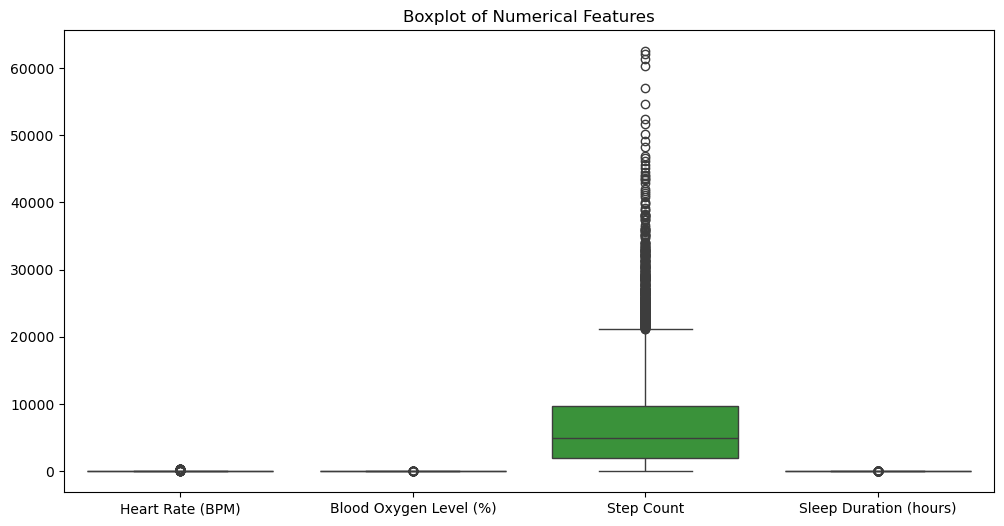

In [111]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count', 'Sleep Duration (hours)']])
plt.title('Boxplot of Numerical Features')
plt.show()

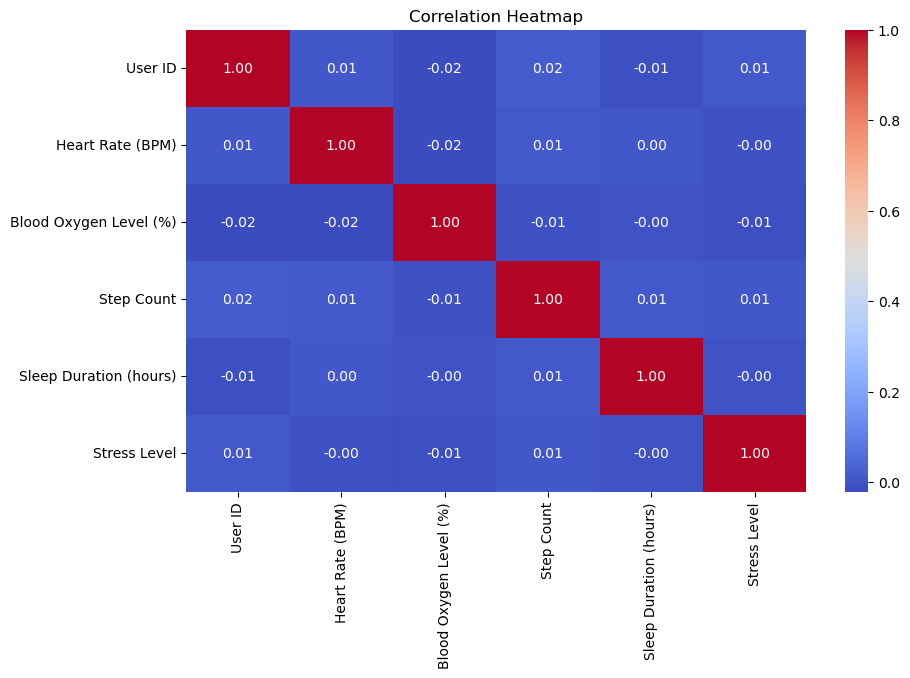

In [112]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

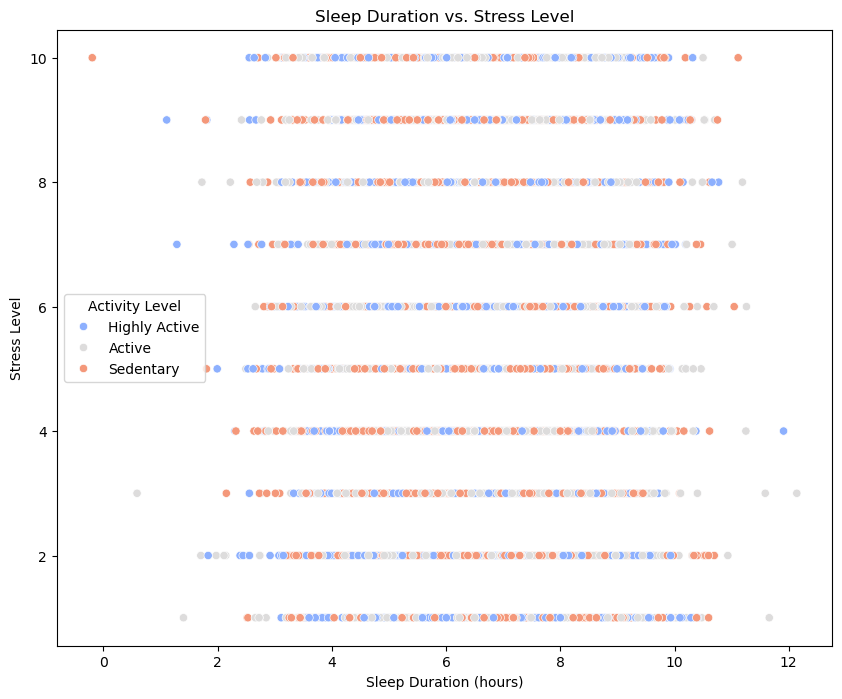

In [113]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Sleep Duration (hours)', y='Stress Level', data=df, hue='Activity Level', palette= 'coolwarm')
plt.title('Sleep Duration vs. Stress Level')
plt.show()


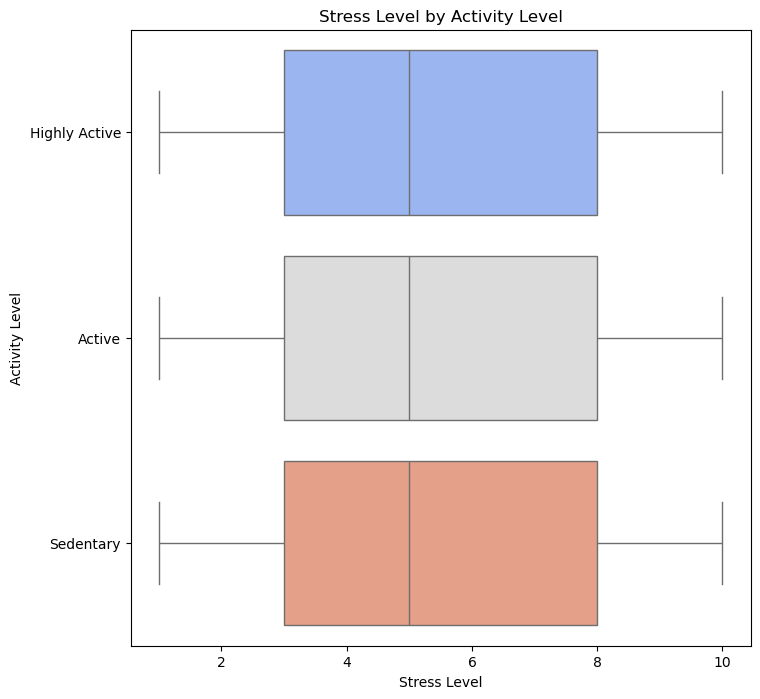

In [115]:
plt.figure(figsize=(8,8))

sns.boxplot(
    data = df,
    x = 'Stress Level',
    y = 'Activity Level',
    palette = 'coolwarm',
    hue = 'Activity Level'
)

plt.legend([], [], frameon=False)
plt.title('Stress Level by Activity Level')
plt.xticks(size = 10)
plt.xlabel('Stress Level')
plt.ylabel('Activity Level')

plt.show()

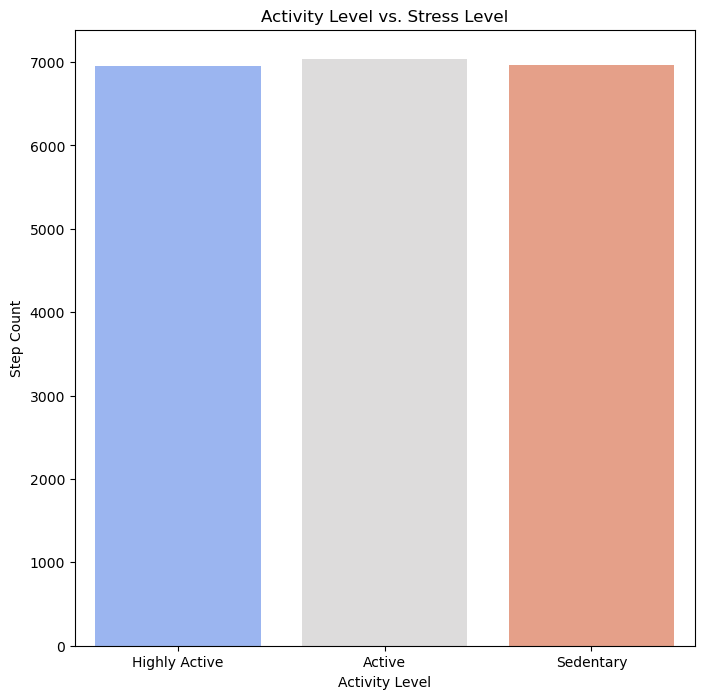

In [116]:
plt.figure(figsize=(8,8))
sns.barplot(x='Activity Level', y='Step Count', estimator = np.mean, errorbar = None, data=df, palette = 'coolwarm', hue = 'Activity Level')
plt.title('Activity Level vs. Stress Level')
plt.xticks(size = 10)
plt.show()

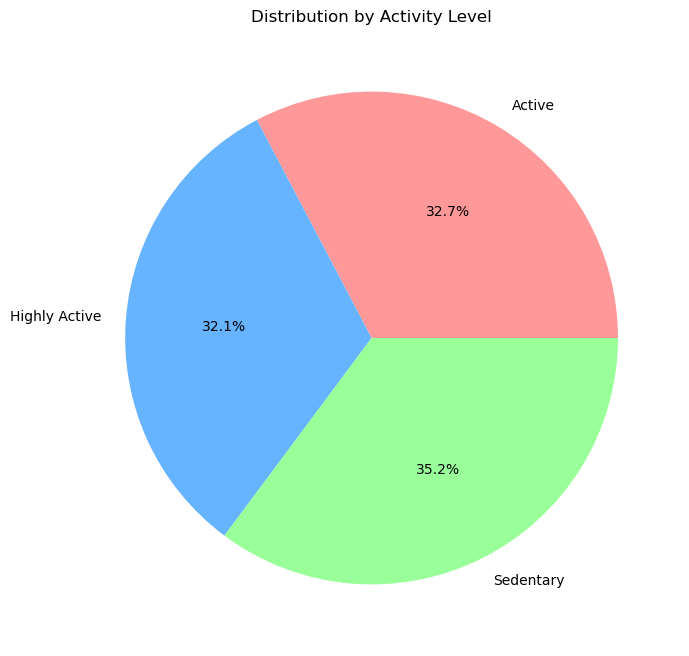

In [118]:
groupby1= df.groupby('Activity Level')['User ID'].count().reset_index()
plt.figure(figsize=(10,8))
plt.pie(
    data = groupby1, 
    x = 'User ID',
    labels = 'Activity Level',
    autopct='%1.1f%%',
    colors = ['#FF9999', '#66B3FF', '#99FF99']
)


plt.title('Distribution by Activity Level')
plt.xticks(size = 10)
plt.show()

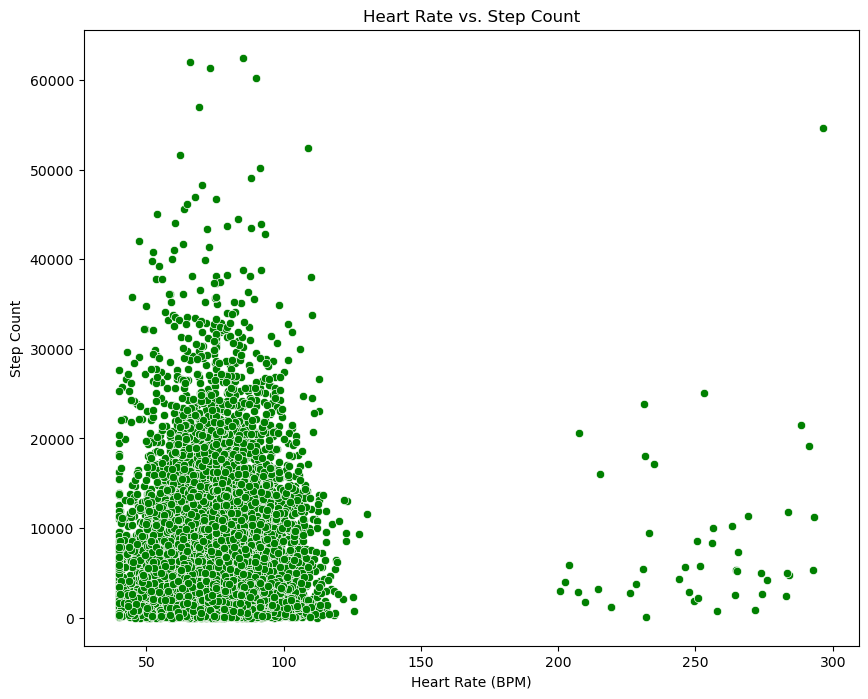

In [119]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    data = df,
    x='Heart Rate (BPM)',
    y = 'Step Count',
    color = 'g'
)

plt.title('Heart Rate vs. Step Count')
plt.xticks(size = 10)
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Step Count')

plt.show()

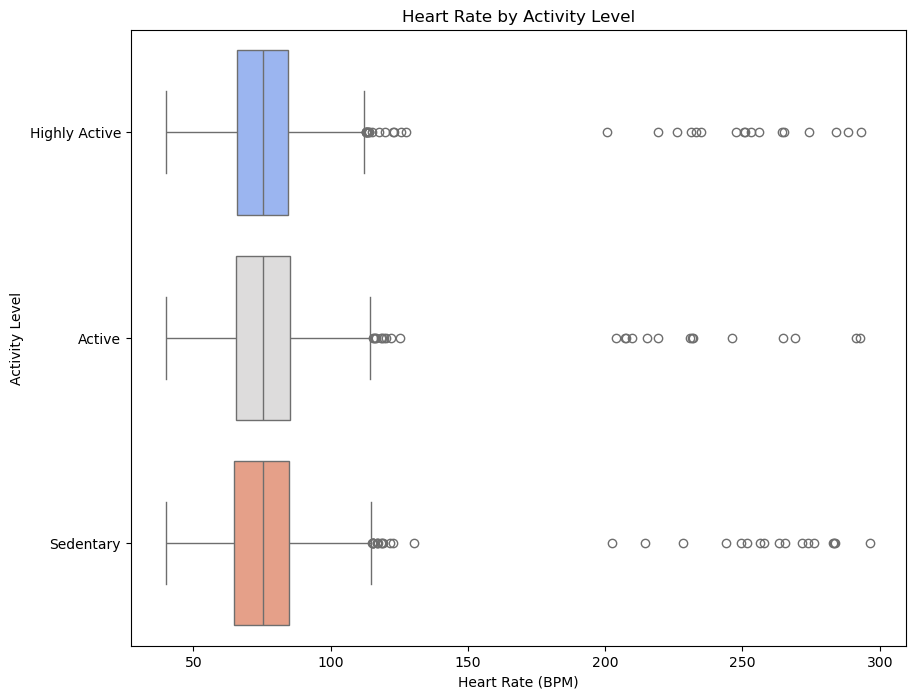

In [120]:
plt.figure(figsize=(10,8))

sns.boxplot(
    data = df,
    x = 'Heart Rate (BPM)',
    y = 'Activity Level',
    palette = 'coolwarm',
    hue = 'Activity Level'
)

plt.legend([],[], frameon = False)
plt.title('Heart Rate by Activity Level')
plt.xticks(size = 10)
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Activity Level')

plt.show()

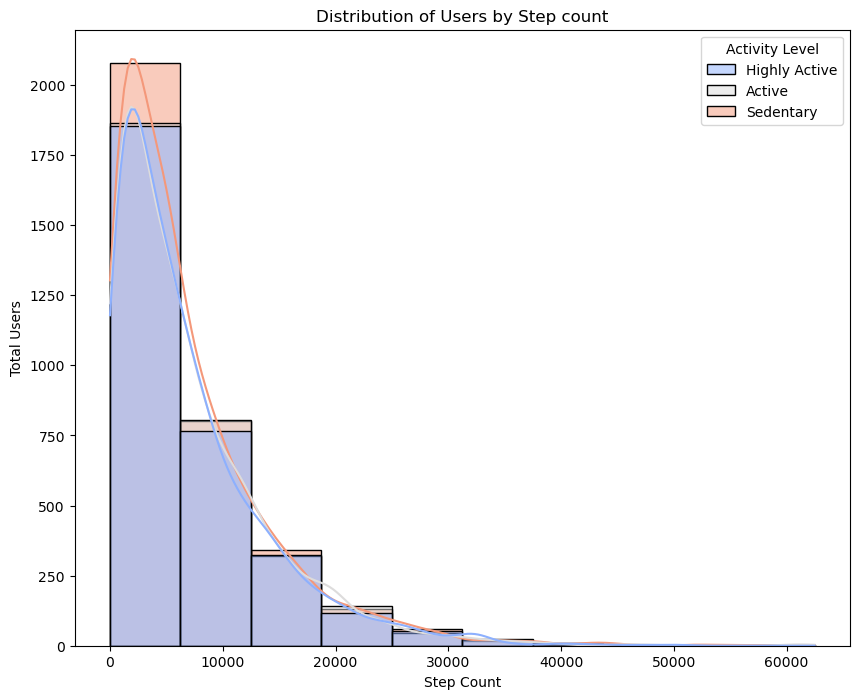

In [121]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.figure(figsize=(10,8))

sns.histplot(
    data = df,
    x = 'Step Count',
    bins = 10,
    kde = True,
    palette = 'coolwarm',
    hue = 'Activity Level'
)

plt.title('Distribution of Users by Step count')
plt.xlabel('Step Count')
plt.ylabel('Total Users')
plt.show()

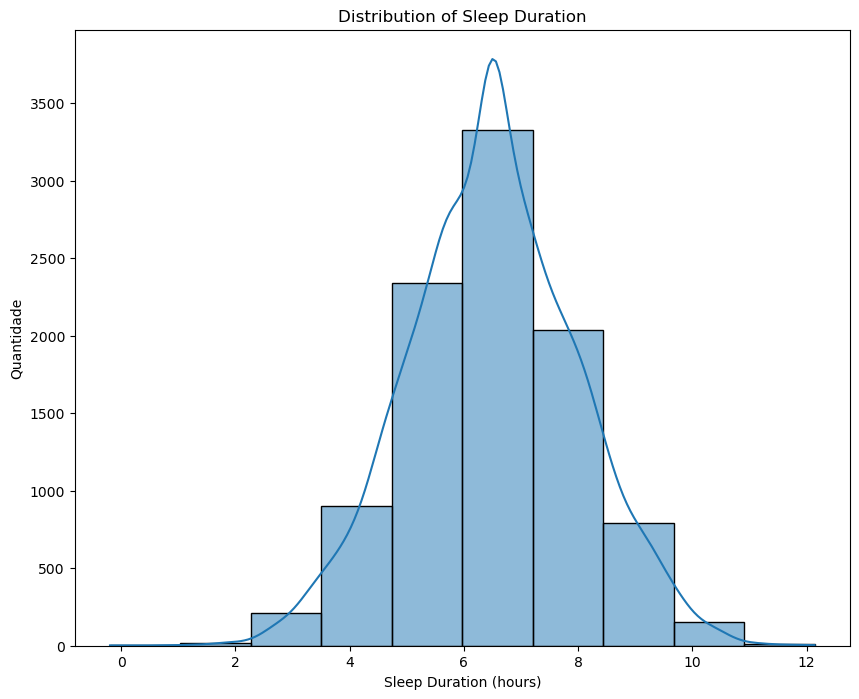

Average sleep duration: 6.50 hours
Median sleep duration: 6.50 hours
Maximum sleep duration: 12.14 hours
Minimum: -0.19 hours


In [122]:
plt.figure(figsize= (10,8))

sns.histplot(
    data = df,
    x = 'Sleep Duration (hours)',
    bins = 10,
    kde = True,
)

plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quantidade')

plt.show()

avg_sleep = df['Sleep Duration (hours)'].mean()
median_sleep = df['Sleep Duration (hours)'].median()
max_sleep = df['Sleep Duration (hours)'].max()
min_sleep = df['Sleep Duration (hours)'].min()
print(f'Average sleep duration: {avg_sleep:.2f} hours')
print(f'Median sleep duration: {median_sleep:.2f} hours')
print(f'Maximum sleep duration: {max_sleep:.2f} hours')
print(f'Minimum: {min_sleep:.2f} hours')

## Modeling
The primary goal is to predict the **Stress Level** based on other variables.

- We converted the Stress Level into categories: **Low**, **Medium**, **High**
- Split the dataset into training and test sets (80/20 split)
- Trained multiple models:
  - Logistic Regression
  - Random Forest
  - SVM
  - K-Nearest Neighbors

Hyperparameters were tuned using GridSearchCV. Performance was evaluated using metrics such as accuracy, precision, recall, and F1 score.


In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [134]:
# Optional: Convert continuous stress into Low, Medium, High
df['Stress Level'] = pd.qcut(df['Stress Level'], q=3, labels=['Low', 'Medium', 'High'])

In [136]:
df['Stress Level'].value_counts()

Stress Level
Low       4114
Medium    2899
High      2786
Name: count, dtype: int64

In [138]:
X = df[['Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count', 'Sleep Duration (hours)', 'Activity Level']]
y = df['Stress Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [268]:
# Encode any categorical feature columns in X (if any)
categorical_cols = X_train.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le


In [270]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [273]:
# Random Forest (No scaling needed)
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [274]:
# Logistic Regression (needs scaled data)
lr = LogisticRegression(max_iter=1000)
lr_params = {'C': [0.1, 1.0, 10.0]}
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0]}, scoring='accuracy')

In [275]:
# SVM (needs scaled data)
svm = SVC()
svm_params = {'C': [0.1, 1.0], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [276]:
def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"----- {name} -----")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print()

In [277]:
# Random Forest Evaluation
evaluate(rf_grid.best_estimator_, X_test, y_test, "Random Forest")

# Logistic Regression Evaluation
evaluate(lr_grid.best_estimator_, X_test_scaled, y_test, "Logistic Regression")

# SVM Evaluation
evaluate(svm_grid.best_estimator_, X_test_scaled, y_test, "SVM")

----- Random Forest -----
              precision    recall  f1-score   support

        High       0.39      0.03      0.05       557
         Low       0.42      0.96      0.59       823
      Medium       0.37      0.03      0.05       580

    accuracy                           0.42      1960
   macro avg       0.39      0.34      0.23      1960
weighted avg       0.40      0.42      0.28      1960

Accuracy: 0.4204081632653061

----- Logistic Regression -----
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       557
         Low       0.42      1.00      0.59       823
      Medium       0.00      0.00      0.00       580

    accuracy                           0.42      1960
   macro avg       0.14      0.33      0.20      1960
weighted avg       0.18      0.42      0.25      1960

Accuracy: 0.41989795918367345

----- SVM -----
              precision    recall  f1-score   support

        High       0.00      0.00      0.00     

## Results and Interpretation
### Model Performance Summary
We tested three machine learning models — **Random Forest**, **Logistic Regression**, and **Support Vector Machine (SVM)** — to predict **Stress Level** (Low, Medium, High) using smartwatch data. Below is a summary of their performance on the test set:

---

#### **Random Forest**
- **Accuracy**: `42.04%`
- **Precision/Recall/F1**:
  - **High**: Precision = 0.39, Recall = 0.03, F1 = 0.05
  - **Medium**: Precision = 0.37, Recall = 0.03, F1 = 0.05
  - **Low**: Precision = 0.42, Recall = 0.96, F1 = 0.59

While Random Forest achieved the **highest F1-score for the "Low" stress** category, it **struggled significantly with "Medium" and "High"**. The model seems to overpredict the "Low" class due to class imbalance.

---

#### **Logistic Regression**
- **Accuracy**: `41.99%`
- **Precision/Recall/F1**:
  - **High**: Precision = 0.00, Recall = 0.00, F1 = 0.00
  - **Medium**: Precision = 0.00, Recall = 0.00, F1 = 0.00
  - **Low**: Precision = 0.42, Recall = 1.00, F1 = 0.59

Fails to predict "High" and "Medium" classes. Performs essentially like a **majority classifier**, always predicting the dominant class ("Low").

---

#### **SVM (Support Vector Machine)**
- **Accuracy**: `41.99%`
- **Precision/Recall/F1**:
  - **High**: Precision = 0.00, Recall = 0.00, F1 = 0.00
  - **Medium**: Precision = 0.00, Recall = 0.00, F1 = 0.00
  - **Low**: Precision = 0.42, Recall = 1.00, F1 = 0.59

Mirrors Logistic Regression’s performance — predicts only the "Low" class.

---

### Interpretation

- All models show **bias toward the "Low" stress level**, indicating a likely **class imbalance** issue in the dataset.
- Neither Logistic Regression nor SVM could meaningfully classify "Medium" or "High" stress cases.
- Random Forest performed slightly better but still failed to generalize across all classes.

---

### Key Takeaways

- **Data Imbalance** is a critical problem: the models are overwhelmed by the dominant "Low" class.
- To improve:
  - Apply **resampling techniques** such as **SMOTE (Synthetic Minority Oversampling Technique)** or **random oversampling**.
  - Use **class weighting** in model training.
  - Try different modeling approaches (e.g., **XGBoost** with balanced class weights).
  - Explore **feature selection** or **dimensionality reduction** (e.g., **PCA**) to improve signal-to-noise ratio.

---



In [279]:
print("Random Forest Best Params:", rf_grid.best_params_)
print("Logistic Regression Best Params:", lr_grid.best_params_)
print("SVM Best Params:", svm_grid.best_params_)

Random Forest Best Params: {'max_depth': 10, 'n_estimators': 100}
Logistic Regression Best Params: {'C': 0.1}
SVM Best Params: {'C': 0.1, 'kernel': 'linear'}


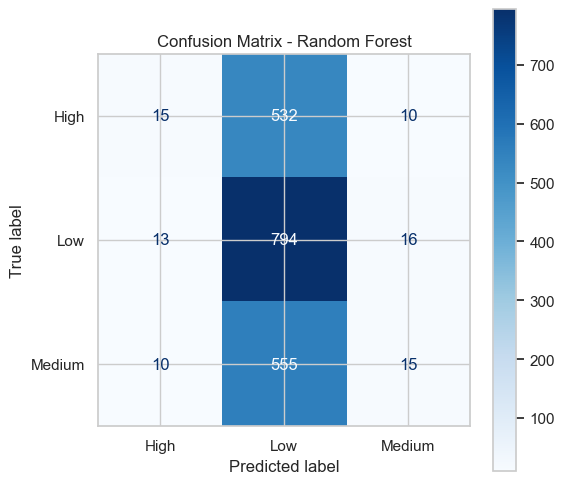

In [286]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_rf = rf_grid.best_estimator_.predict(X_test)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(rf_grid.best_estimator_, X_test, y_test, ax=ax, cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

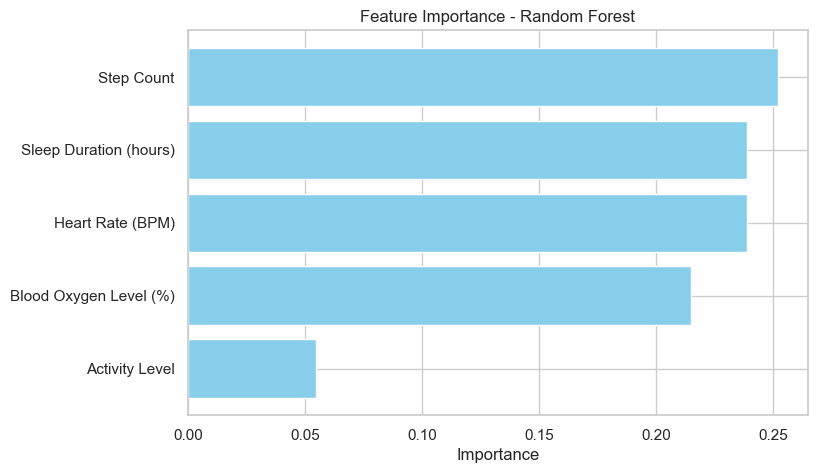

                  Feature  Importance
2              Step Count    0.252298
3  Sleep Duration (hours)    0.239055
0        Heart Rate (BPM)    0.238967
1  Blood Oxygen Level (%)    0.215005
4          Activity Level    0.054675


In [288]:
importances = rf_grid.best_estimator_.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

print(feat_importances)

## Pushing the Boundaries

To enhance the predictive power of our stress classification task and go beyond traditional classification models, we implemented two advanced ensemble learning techniques from `scikit-learn`: **Gradient Boosting Classifier** and **HistGradient Boosting Classifier**.

These models are known for their ability to handle complex patterns and offer better control over bias-variance tradeoffs through fine-tuning.

### Gradient Boosting Classifier
- This model builds decision trees sequentially, where each new tree corrects the errors made by the previous ones.
- It performed slightly better in terms of recall for the "Medium" class.
- **Accuracy:** 41.6%
- However, precision and recall were low for the "Low" and "High" classes, suggesting that class imbalance or feature overlap may be impacting performance.

### HistGradient Boosting Classifier
- This is a more efficient variant of gradient boosting that uses histogram-based algorithms to speed up training, especially useful for large datasets.
- While it ran faster and consumed less memory, its accuracy was slightly lower at **36.4%**.
- It showed a more balanced performance across all classes but still struggled with precise classification of the "Low" and "High" categories.

### Summary
Despite moderate improvements, these advanced models highlight the **challenge of stress prediction** due to overlapping health indicators and label imbalance. However, their inclusion demonstrates an effort to **push the modeling complexity** beyond what's typically covered in introductory data science courses.


In [170]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Activity Level'
le_activity = LabelEncoder()
df['Activity Level'] = le_activity.fit_transform(df['Activity Level'])

# Encode 'Stress Level' (Target)
le_stress = LabelEncoder()
df['Stress Level'] = le_stress.fit_transform(df['Stress Level'])


In [172]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Stress Level'])
y = df['Stress Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [174]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# HistGradient Boosting Classifier
hgbc = HistGradientBoostingClassifier(random_state=42)
hgbc.fit(X_train, y_train)


HistGradientBoostingClassifier(random_state=42)

In [178]:
from sklearn.metrics import classification_report, accuracy_score

# Predict
y_pred_gbc = gbc.predict(X_test)
y_pred_hgbc = hgbc.predict(X_test)

# Define class labels as strings
target_names = ['Low', 'Medium', 'High']

# Evaluate
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gbc, target_names=target_names))
print("Accuracy:", accuracy_score(y_test, y_pred_gbc))

print("\nHistGradient Boosting Classifier:")
print(classification_report(y_test, y_pred_hgbc, target_names=target_names))
print("Accuracy:", accuracy_score(y_test, y_pred_hgbc))


Gradient Boosting Classifier:
              precision    recall  f1-score   support

         Low       0.31      0.04      0.08       557
      Medium       0.42      0.93      0.58       823
        High       0.36      0.05      0.09       580

    accuracy                           0.42      1960
   macro avg       0.36      0.34      0.25      1960
weighted avg       0.37      0.42      0.29      1960

Accuracy: 0.4163265306122449

HistGradient Boosting Classifier:
              precision    recall  f1-score   support

         Low       0.28      0.16      0.21       557
      Medium       0.41      0.63      0.50       823
        High       0.28      0.19      0.22       580

    accuracy                           0.36      1960
   macro avg       0.32      0.33      0.31      1960
weighted avg       0.34      0.36      0.33      1960

Accuracy: 0.3647959183673469


## References
Below are the references and resources used during the development of this project:

### Dataset & Domain Understanding

- Kaggle. (2023). *Smartwatch Health Data*. Retrieved from: https://www.kaggle.com/datasets/shubhambathwal/stress-level-detection  
- Choi, Y., & Lee, J. (2021). *Wearable Device Data and Stress Detection: A Review*. Journal of Healthcare Informatics Research, 5(4), 342–360. https://doi.org/10.1007/s41666-021-00091-9  
- Harvard Health Publishing. (2020). *How stress affects your body*. Harvard Medical School. https://www.health.harvard.edu/staying-healthy/how-stress-affects-your-body  

### Python Libraries & Tools

- McKinney, W. (2010). *Data Structures for Statistical Computing in Python*. In Proceedings of the 9th Python in Science Conference (pp. 51–56). https://doi.org/10.25080/Majora-92bf1922-00a  
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). *Scikit-learn: Machine Learning in Python*. Journal of Machine Learning Research, 12, 2825–2830. http://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html  
- Hunter, J. D. (2007). *Matplotlib: A 2D Graphics Environment*. Computing in Science & Engineering, 9(3), 90–95. https://doi.org/10.1109/MCSE.2007.55  
- Waskom, M. L. (2021). *Seaborn: Statistical Data Visualization*. Journal of Open Source Software, 6(60), 3021. https://doi.org/10.21105/joss.03021  
- Abadi, M., Agarwal, A., Barham, P., et al. (2016). *TensorFlow: Large-scale machine learning on heterogeneous systems*. https://www.tensorflow.org/

### Machine Learning Techniques

- Friedman, J. H. (2001). *Greedy function approximation: A gradient boosting machine*. Annals of Statistics, 29(5), 1189–1232. https://doi.org/10.1214/aos/1013203451  
- Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O’Reilly Media.

### Artificial Intelligence Assistance

- OpenAI. (2024). *ChatGPT: Language Model Assistance for Code and Technical Writing*. Retrieved from https://openai.com/chatgpt  
  > Used for guidance on model selection, preprocessing advice, and markdown formatting.


